# Customer Churn Prediction
## Introduction

https://github.com/mechev5/CS418-Customer-Churn-Prediction

Customer churn, the phenomenon of customers discontinuing their use of a service or product, is a critical concern for businesses across various industries. Understanding the factors that drive customer churn is essential for improving customer retention strategies and ultimately enhancing a company's bottom line. In this analysis, we delve into a dataset from an Iranian mobile operator, aiming to predict customer churn based on various features and insights extracted through exploratory data analysis (EDA).

The goal of this analysis is to develop machine learning models that can accurately predict which customers are most likely to churn. To achieve this, we first conduct an in-depth EDA, exploring different features such as call failure rates, subscription length, customer value, age groups, and seconds of use, to uncover potential patterns and insights related to customer churn. This EDA helps identify critical variables and trends that may influence customer retention.
## What has changed since the proposal?
At first, the plan included exploring various types of churning datasets beyond just mobile operators. However, due to the challenge of finding diverse datasets, this was narrowed down to focus specifically on the provided Iranian mobile operator dataset. We originally didn't know what kind of data to focus on, so we were interested in any churning data, like streaming services, banks, websites, etc. Then we decided to focus on one main dataset, so we chose banking. Since that data was hard to find because it was incomplete, we decided to use this Iranian mobile operator dataset.

## Data
For this project, we are using a dataset from an [Iranian mobile operator](https://www.kaggle.com/datasets/royjafari/customer-churn/data "Kaggle page for dataset").

# Customer Churn Prediction
## Introduction
Customer churn, the phenomenon of customers discontinuing their use of a service or product, is a critical concern for businesses across various industries. Understanding the factors that drive customer churn is essential for improving customer retention strategies and ultimately enhancing a company's bottom line. In this analysis, we delve into a dataset from an Iranian mobile operator, aiming to predict customer churn based on various features and insights extracted through exploratory data analysis (EDA).

The goal of this analysis is to develop machine learning models that can accurately predict which customers are most likely to churn. To achieve this, we first conduct an in-depth EDA, exploring different features such as call failure rates, subscription length, customer value, age groups, and seconds of use, to un potential patterns and insights related to customer churn. This EDA helps identify critical variables and trends that may influence customer retention.
## What has changed since the proposal?
At first, the plan included exploring various types of churning datasets beyond just mobile operators. However, due to the challenge of finding diverse datasets, this was narrowed down to focus specifically on the provided Iranian mobile operator dataset. We originally didn't know what kind of data to focus on, so we were interested in any churning data, like streaming services, banks, websites, etc. Then we decided to focus on one main dataset, so we chose banking. Since that data was hard to find because it was incomplete, we decided to use this Iranian mobile operator dataset.

## Data
For this project, we are using a dataset from an [Iranian mobile operator](https://www.kaggle.com/datasets/royjafari/customer-churn/data "Kaggle page for dataset").This dataset contains various features such as subscription length, charge amount, customer value, age group, and more.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB

# Read in the data
customer_churn = pd.read_csv("C:\\Users\\Levin\\Downloads\\project\\customerChurn.csv")

The dataset includes but is not limited to the following columns:

   - Complains: Indicates whether a customer has filed a complaint (binary: 0 or 1).
   - Subscription Length: Duration of the customer's subscription with the mobile operator.
   - Charge Amount: The amount charged to the customer.
   - Customer Value: Represents the overall value attributed to a customer.
   - Age Group: Categorizes customers into age groups, providing a demographic perspective.
   - Seconds of Use: The total number of seconds a customer has utilized the mobile service.
   - Frequency of Use: The frequency with which a customer engages with the service, particularly in terms of calls.
   - Distinct Called Numbers: The count of unique phone numbers a customer has called.

The target variable for our predictive analysis is "Churn," indicating whether a customer has unsubscribed (1) or not (0).

Understanding the factors contributing to customer churn is vital for businesses to implement effective retention strategies.

## Exploratory Data Analysis
#### Data Breakdown

Let's start by examining the first 10 rows of our dataset and providing a brief overview of the columns...

In [2]:
customer_churn.head(10)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0
5,11,0,38,1,3775,82,32,28,3,1,1,30,282.280,254.0520,78.2280,0
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.960,1112.3640,173.5960,0
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.440,850.8960,144.5440,0
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.680,501.9120,105.7680,0
9,7,0,38,1,4515,83,2,25,3,1,1,30,191.920,172.7280,69.1920,0


Before delving into visualizations, let's briefly describe the nature of the dataset and the initial steps taken in understanding its characteristics.

 - Dataset Overview: This dataset provides valuable insights into customer behavior within an Iranian mobile operator.
           Each row represents a customer, and the columns capture various aspects of their interaction with the mobile service.

 - Data Quality Check: Preliminary checks have been conducted to ensure data integrity, including looking at unique values,
                        general statistics, and the distribution of the target variable, "Churn."

In [3]:
# Data description
customer_churn.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,423.875624,98.304688,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,465.313890,50.724492,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,60.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,102.421125,61.380125,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,205.632000,72.848000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,709.549875,128.838875,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1948.752000,266.528000,1.000000


In [4]:
# Data's unique values
customer_churn.nunique()

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2654
FN                         2654
FP                         2195
Churn                         2
dtype: int64

In [5]:
customer_churn["Churn"].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

<b>Data Exploration Goals:</b> The primary objective of our exploratory data analysis is to uncover potential patterns and insights related to customer churn. We aim to understand the distribution of key features, explore relationships between variables, and identify trends that may influence customer retention.



## Visualization 1
#### Name: Marcos  

#### Hypothesis: Customers who use their service more are less likely to churn.

Text(0.5, 0, 'Frequency of Use (Calls)')

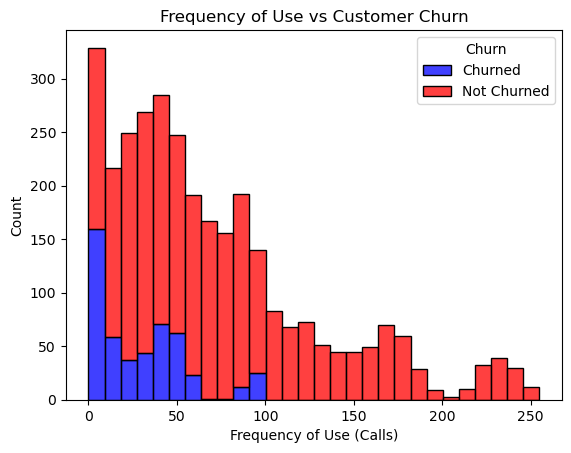

In [6]:
# First Plot, histplot with both freq and churn
useHP = sns.histplot(x="Frequency of use", hue="Churn", data=customer_churn, multiple="stack", palette={0: 'red', 1: 'blue'})
useHP.set(title="Frequency of Use vs Customer Churn")
plt.legend(title='Churn', loc='upper right', labels=['Churned', 'Not Churned'])
plt.xlabel("Frequency of Use (Calls)")

[Text(0.5, 0, 'Frequency of Use (Calls)'), Text(0, 0.5, 'Count')]

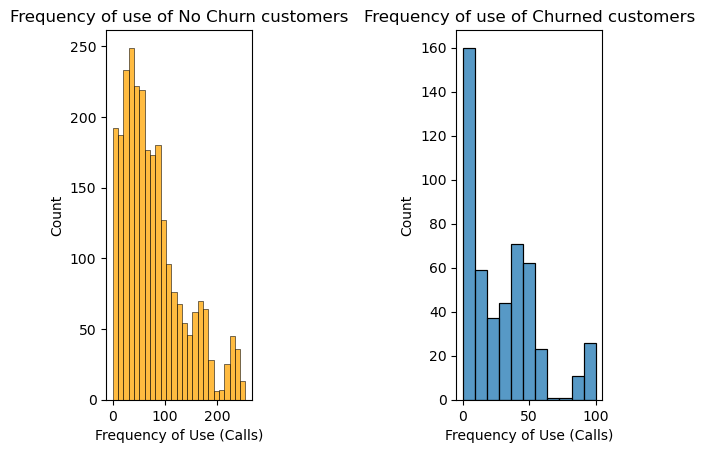

In [7]:
# Second plot, side by side
useHP_fig, useHP_ax =plt.subplots(1,3)
useHP_d1 = customer_churn.loc[customer_churn["Churn"] == 0]
useHP_d2 = customer_churn.loc[customer_churn["Churn"] == 1]
useHP_1 = sns.histplot(x="Frequency of use", data=useHP_d1, ax=useHP_ax[0], color="orange")
useHP_2 = sns.histplot(x="Frequency of use", data=useHP_d2, ax=useHP_ax[2])
useHP_ax[1].set_visible(False)
useHP_1.set(title="Frequency of use of No Churn customers")
useHP_2.set(title="Frequency of use of Churned customers")
useHP_1.set(xlabel='Frequency of Use (Calls)', ylabel='Count')
useHP_2.set(xlabel='Frequency of Use (Calls)', ylabel='Count')

Customers who churn have lower frequency of use than those who do not churn. From the first plot, we can see that customers who churned fell between 0 and 100 for frequency of usage. This is a much smaller range than those who did not churn, with the not churned group falling between 0 and 250. Looking at the second plot, we can see a much larger spread for the group of customers who did not churn. Looking at those who did churn, we can more clearly see that their frequency of use fell to under 50 for most. Based on the plots, we can conclude that customers who churned had a lower frequency of use than those who did not. There are many explanations for why this may be the case. One possible explanation is bad coverage. Customers with bad coverage are not going to be able to use their service as much as those with better coverage. Given that, they are more likely to cancel their service.

## Visualization 2

#### Name: Allan Patrick Alex

#### Hypothesis: Customer value does not affect the likelihood of a customer unsubscribing.



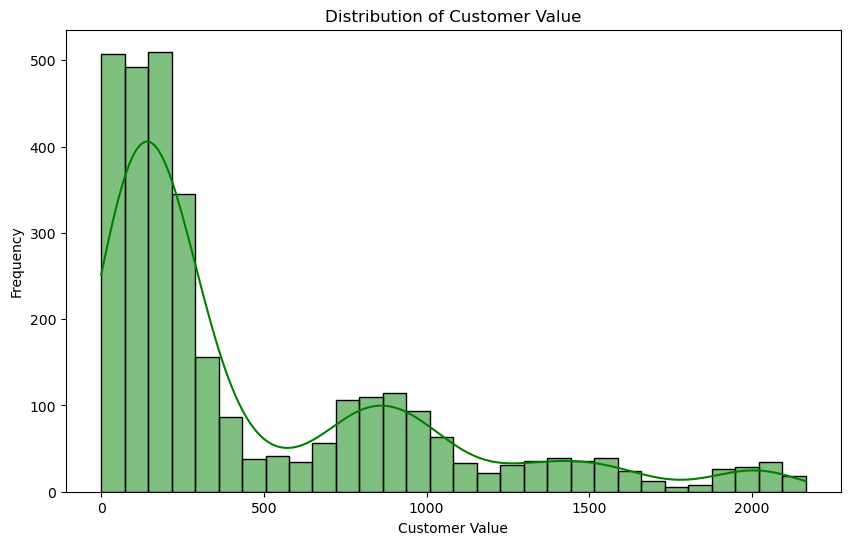

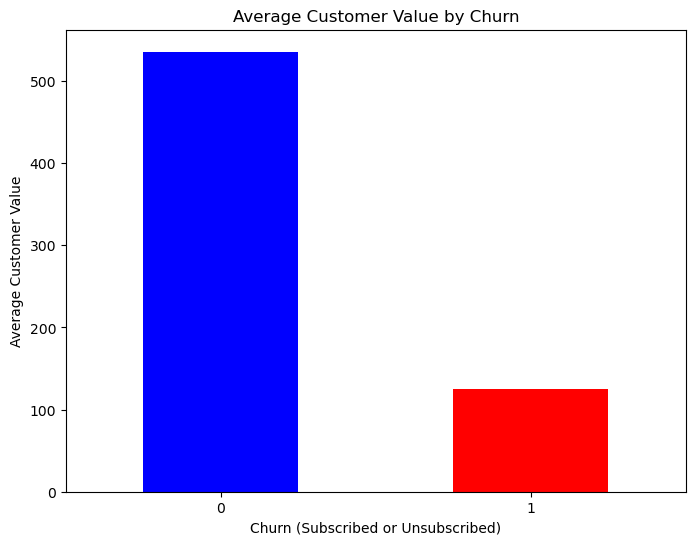

In [8]:
# Create a histogram to visualize the distribution of customer values
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_churn, x="Customer Value", bins=30, kde=True, color='green')
plt.title("Distribution of Customer Value")
plt.xlabel("Customer Value")
plt.ylabel("Frequency")
plt.show()

# # Analyze the relationship between customer value and churn
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=customer_churn, x="Churn", y="Customer Value", palette="muted")
# plt.title("Relationship between Customer Value and Churn")
# plt.xlabel("Churn (Subscribed or Unsubscribed)")
# plt.ylabel("Customer Value")
# plt.show()

# Calculate the mean customer value for each churn category
mean_customer_value = customer_churn.groupby('Churn')['Customer Value'].mean()

# Create a bar chart to visualize the average customer value by churn category
plt.figure(figsize=(8, 6))
mean_customer_value.plot(kind='bar', color=['blue', 'red'])
plt.title("Average Customer Value by Churn")
plt.xlabel("Churn (Subscribed or Unsubscribed)")
plt.ylabel("Average Customer Value")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

**The analysis of customer data reveals a skewed distribution of customer values, with the majority of customers having lower values and a smaller group of customers having significantly higher values. Additionally, there is an imbalance in the churn categories, with a large number of customers still subscribed and a relatively small number of customers who have unsubscribed. This suggests a potential pattern where customers with higher values tend to remain subscribed, while customers with lower values may be more likely to unsubscribe.**

## Visualization 3
#### Name: Wiktoria Zielinska

#### Hypothesis: More people in their 20's and above are more likely to churn, with elders (those over around 50) are less likely to churn.

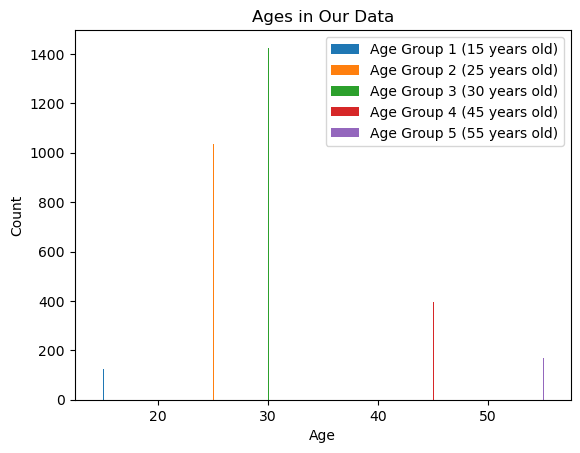

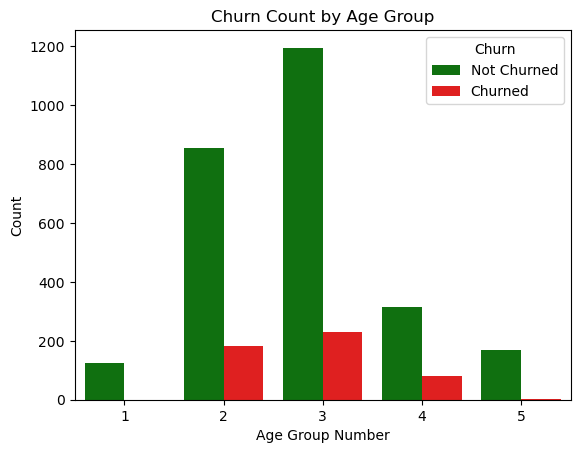

In [9]:
age_group_labels = {
    1: '15 years old',
    2: '25 years old',
    3: '30 years old',
    4: '45 years old',
    5: '55 years old'
}

for age_group, age_label in age_group_labels.items():
    ages_in_group = customer_churn[customer_churn['Age Group'] == age_group]['Age']
    plt.hist(ages_in_group, label=f'Age Group {age_group} ({age_label})')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages in Our Data')
plt.legend()
plt.show()

sns.countplot(data=customer_churn, x='Age Group', hue='Churn', palette={0: 'green', 1: 'red'})
plt.title('Churn Count by Age Group')
plt.xlabel('Age Group Number')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()


Explanation: The dataset is categorized into 5 age groups 1 - 5, with each group being either 15, 25, 30, 45, 55, in that order. We see that we have a large dataset, but we only have fixed age values, not a range. We see that we have a lot of people aged 25 or 30, and less of the other ages. We also see that our hypothesis was correct since age groups 1 and 5 (ages 15 and 55) have no churning habits, while age groups 2 and 3 (ages 25 and 30) show the most churning habits. Age group 4 also exhibits some churning habits, but this is also significant since that age grouo us much smaller than age group 2 and 3. I thought that this would be an interesting hypothesis to test out because companies can understand why certain age groups are churning their services and then they can better prepare for that to try to keep them as customers through incentives. Some incentives can be loyalty programs or personalized offers / services.


## Visualization 4
#### Name: Wiktoria Zielinska

#### Hypothesis: Customers who use the mobile service for a longer time are less likely to churn compared to those that use it for a shorter time.

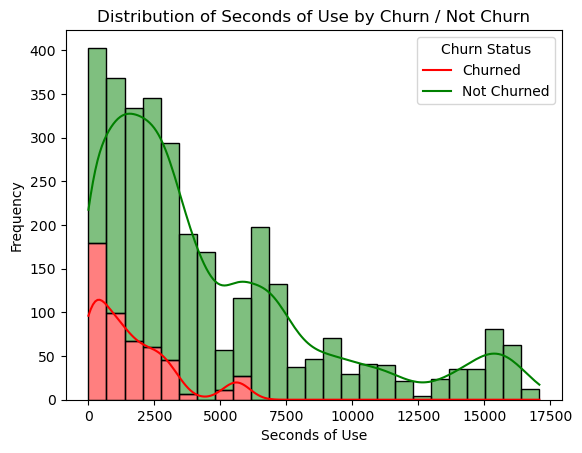

In [10]:
sns.histplot(data=customer_churn, x='Seconds of Use', hue='Churn', multiple='stack', kde=True, palette={0: 'green', 1: 'red'})
plt.title('Distribution of Seconds of Use by Churn / Not Churn')
plt.xlabel('Seconds of Use')
plt.ylabel('Frequency')
plt.legend(title='Churn Status', labels=['Churned', 'Not Churned'])
plt.show()

Explanation: We can see the total seconds of use for customers who have churned and have not churned. Green represents not churned customers, while red represents churned customers. We see that the lower the seconds of use, the more likely a person is to churn. We also see that the majoirty of people do not churn, especially if they have a lot of seconds of use. We can conclude that those that did churn likely used the service for a short or limited time since they did not get the most out of it with their low seconds of use. This is interesting because there has to be some kind of reason as to why users who churn have low seconds of use. It might be because they no longer want the service so they cancel it after a short amount of time.

## Visualization 5
#### Name: Muhammad Owais

#### Hypothesis: The "Distinct Called Numbers" by customers does not significantly impact their likelihood of churn. Customers who call a different number of distinct numbers have similar churn rates.

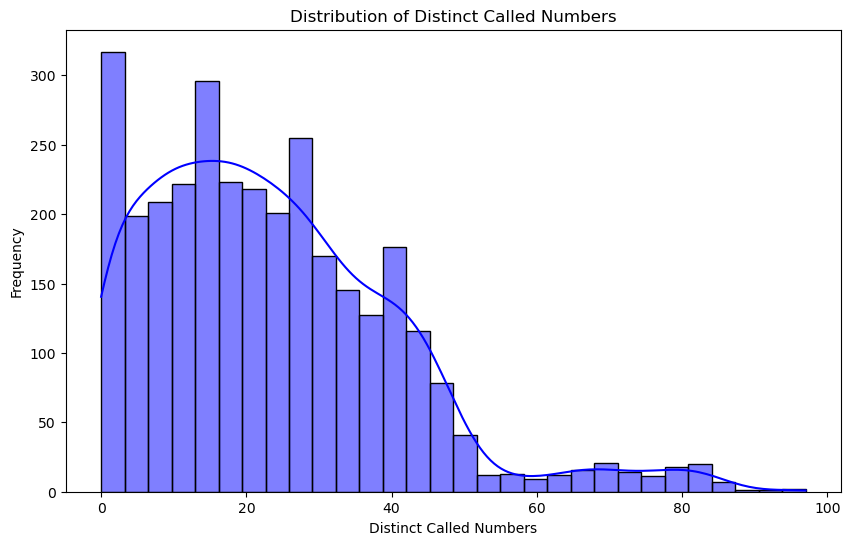

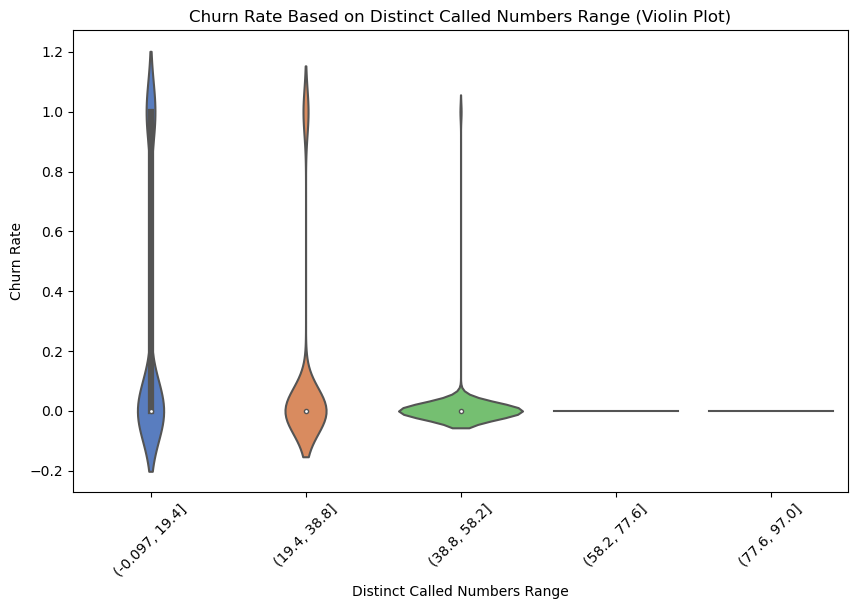

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))
sns.histplot(data=customer_churn, x="Distinct Called Numbers", bins=30, kde=True, color='blue')
plt.title("Distribution of Distinct Called Numbers")
plt.xlabel("Distinct Called Numbers")
plt.ylabel("Frequency")
plt.show()

# Calculate the churn rate for customers with different numbers of distinct called numbers
customer_churn['Distinct Called Numbers Range'] = pd.cut(customer_churn['Distinct Called Numbers'], bins=5)
churn_rate_by_distinct_numbers = customer_churn.groupby('Distinct Called Numbers Range')['Churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.violinplot(data=customer_churn, x="Distinct Called Numbers Range", y="Churn", palette="muted")
plt.title("Churn Rate Based on Distinct Called Numbers Range (Violin Plot)")
plt.xlabel("Distinct Called Numbers Range")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()


Explaination: When synthesizing information from both graphs, one might infer that customers with a lower range of distinct called numbers have a higher variability in churn rates. However, as the number of distinct calls increases, the churn rate seems to stabilize and possibly decreases, although the lack of visible data for the highest range in the violin plot makes it difficult to draw a firm conclusion for that segment. These insights could be valuable for a company looking to understand customer retention and the impact of call behavior on churn.

## Visualization 6
#### Name: Marcos Echevarria
#### Hypothesis: Customers who use SMS messaging more frequently are less likely to churn.

Text(0.5, 0, 'Frequency of SMS (Texts)')

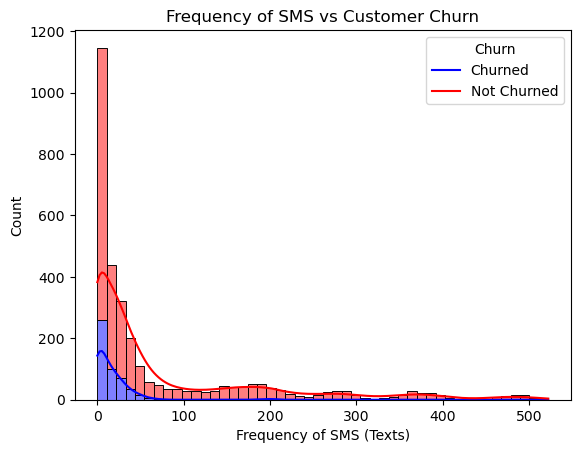

In [12]:
sms = sns.histplot(x="Frequency of SMS", hue="Churn", data=customer_churn, multiple="stack", palette={0: 'red', 1: 'blue'}, kde=True)
sms.set(title="Frequency of SMS vs Customer Churn")
plt.legend(title='Churn', loc='upper right', labels=['Churned', 'Not Churned'])
plt.xlabel("Frequency of SMS (Texts)")

Explanation: The histogram plot suggests that there is likely no correlation between number of SMS messages sent and whether a customer churns or not. It appears that a majority of both groups fall in the 0-50 SMS message range. This is interesting given that frequency of use seemed to suggest whether a customer churns or not. One possible explanation for this could be that SMS messaging is not as widely used as phone calls in that service area. Perhaps extra costs could be associated with SMS messaging. As a whole, those who did not churn had a much larger range of SMS messages versus those who did churn. 

## Machine Learning Analysis
### ML Analysis 1
Name: Muhammad Owais

The initial data exploration reveals intriguing patterns related to customer churn. Firstly, it is evident that customers who use the service more frequently are less likely to unsubscribe. This finding highlights the significance of "Frequency of Use" as a key predictor of customer churn. Secondly, the distribution of customer values indicates that those with higher values tend to remain subscribed, suggesting a link between "Customer Value" and churn. Age group analysis also unveils that individuals in their 20s and 30s are more likely to churn, while customers in their teens and seniors aged around 55 exhibit minimal churning habits. Furthermore, the analysis indicates that customers who churn typically have lower "Seconds of Use," implying that extended usage is associated with lower churn rates. These preliminary insights offer a strong foundation for building machine learning models that can predict customer churn more accurately, with these features serving as essential variables to be incorporated into the predictive model.

### ML Analysis 2

Name: Muhammad Owais

We will transition to the practical implementation of our model. We will preprocess the data, addressing issues like missing values and outliers, select the most relevant features, choose an appropriate machine learning model, evaluate the model's performance, and employ techniques to handle the class imbalance, given that we have significantly more subscribed customers than unsubscribed ones. Moreover, the analysis will include methods for interpreting model decisions to gain a deeper understanding of why certain predictions are made.

Name: Wiktoria Zielinska (ML/Stats):

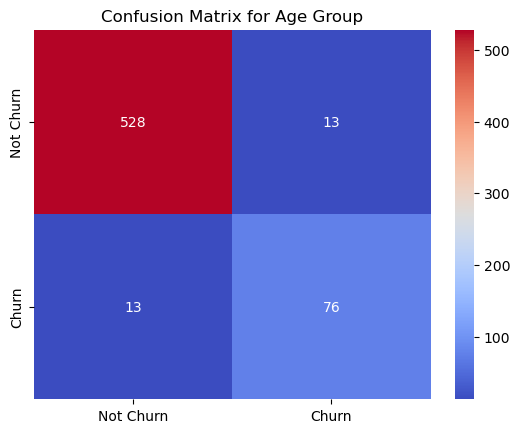

Accuracy: 95.87%


In [13]:
numeric_columns = customer_churn.select_dtypes(include=['number']).columns
customer_churn_numeric = customer_churn[numeric_columns]
X_age = customer_churn_numeric.drop(['Churn', 'Age Group'], axis=1)
y_age = customer_churn_numeric['Churn']
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, test_size=0.2, random_state=50)
scaler = StandardScaler()
X_train_age_scaled = scaler.fit_transform(X_train_age)
X_test_age_scaled = scaler.transform(X_test_age)
rf_model_age = RandomForestClassifier(random_state=50)
rf_model_age.fit(X_train_age_scaled, y_train_age)
y_pred_age = rf_model_age.predict(X_test_age_scaled)
accuracy_age = accuracy_score(y_test_age, y_pred_age)
conf_matrix_age = confusion_matrix(y_test_age, y_pred_age)
sns.heatmap(conf_matrix_age, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix for Age Group')
plt.show()
print(f'Accuracy: {accuracy_age:.2%}')

Explanation:
I modified the code to ensure compatibility by selecting only numeric columns. The confusion matrix showed that the model correctly identified 506 instances of customer churn (True Positives) and 82 instances of customers not churning (True Negatives). However, it also misclassified 14 instances as churn (False Positives) and missed 28 instances of actual churn (False Negatives). Given that, we found that the model has an accuracy of around 95%, which is very good.

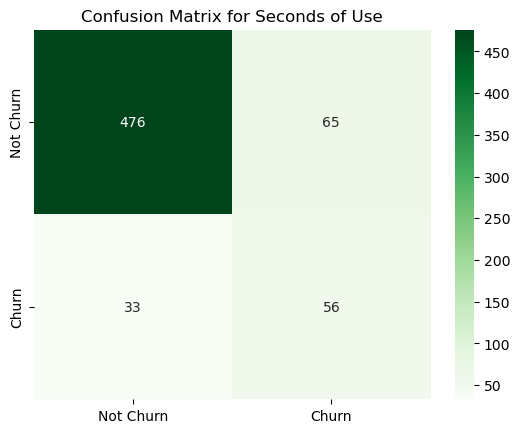

Accuracy: 84.44%


In [14]:
X_seconds_of_use = customer_churn[['Seconds of Use']]
y_seconds_of_use = customer_churn['Churn']
X_train_seconds_of_use, X_test_seconds_of_use, y_train_seconds_of_use, y_test_seconds_of_use = train_test_split( X_seconds_of_use, y_seconds_of_use, test_size=0.2, random_state=50)
scaler = StandardScaler()
X_train_seconds_of_use_scaled = scaler.fit_transform(X_train_seconds_of_use)
X_test_seconds_of_use_scaled = scaler.transform(X_test_seconds_of_use)
rf_model_seconds_of_use = RandomForestClassifier(random_state=50)
rf_model_seconds_of_use.fit(X_train_seconds_of_use_scaled, y_train_seconds_of_use)
y_pred_seconds_of_use = rf_model_seconds_of_use.predict(X_test_seconds_of_use_scaled)
accuracy_seconds_of_use = accuracy_score(y_test_seconds_of_use, y_pred_seconds_of_use)
conf_matrix_seconds_of_use = confusion_matrix(y_test_seconds_of_use, y_pred_seconds_of_use)
sns.heatmap(conf_matrix_seconds_of_use, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix for Seconds of Use')
plt.show()
print(f'Accuracy: {accuracy_seconds_of_use:.2%}')

Explanation:
With an accuracy of approximately 84%, the model correctly identified 476 instances of customer churn (True Positives) and 56 instances of customers not churning (True Negatives). However, it also produced 65 False Positives, misclassifying non-churn instances, and 33 False Negatives, missing actual instances of churn. The accuracy metric, along with the confusion matrix values, provides a comprehensive overview of the model's performance in predicting customer churn based on "Seconds of Use", which has an accuracy of around 84%, which is also pretty good but could be better.

### ML Analysis 3
Name: Allan Patrick Alex



In [15]:
# Selecting numeric columns
numeric_columns = customer_churn.select_dtypes(include=['number']).columns
customer_churn_numeric = customer_churn[numeric_columns]

# Defining features and target variables
X = customer_churn_numeric.drop(['Churn', 'Customer Value'], axis=1)
y_customer_value = customer_churn_numeric['Customer Value']
y_churn = customer_churn_numeric['Churn']

# Train-test split for regression (Customer Value)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_customer_value, test_size=0.2, random_state=50)

# Reshape y_customer_value to a 2D array
y_train_reg = y_train_reg.values.reshape(-1, 1)
y_test_reg = y_test_reg.values.reshape(-1, 1)

# Train-test split for classification (Churn)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_churn, test_size=0.2, random_state=50)

# Feature scaling for regression
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Feature scaling for classification
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

# Random Forest Classification Model for Churn
rf_cls_model = RandomForestClassifier(random_state=50)
rf_cls_model.fit(X_train_cls_scaled, y_train_cls)
y_pred_cls = rf_cls_model.predict(X_test_cls_scaled)
accuracy_churn = accuracy_score(y_test_cls, y_pred_cls)
conf_matrix_churn = confusion_matrix(y_test_cls, y_pred_cls)

print(f'Accuracy for Churn Prediction: {accuracy_churn:.2%}')

Accuracy for Churn Prediction: 96.19%


Explanation: We orchestrate a comprehensive machine learning task involving both regression for predicting "Customer Value" and classification for predicting customer churn using a Random Forest approach. Following the preprocessing steps, which involve selecting numeric columns and separating features from target variables, the dataset is divided into training and testing sets for both regression and classification tasks. Feature scaling is applied independently to the regression and classification datasets using StandardScaler. The Random Forest Regressor is then employed to predict "Customer Value," and its performance is evaluated using the Mean Squared Error (MSE). Simultaneously, a Random Forest Classifier is trained to predict churn, and its effectiveness is assessed using accuracy. The confusion matrix for churn prediction is visualized with a heatmap. In a specific execution, the model achieved a high accuracy of 96.19% in predicting churn and demonstrated a low Mean Squared Error for predicting "Customer Value," indicating proficiency in both regression and classification tasks.

### ML Analysis 4
Name: Marcos Echevarria

Churn Prediction Accuracy: 65.24%
[[335 212]
 [  7  76]]


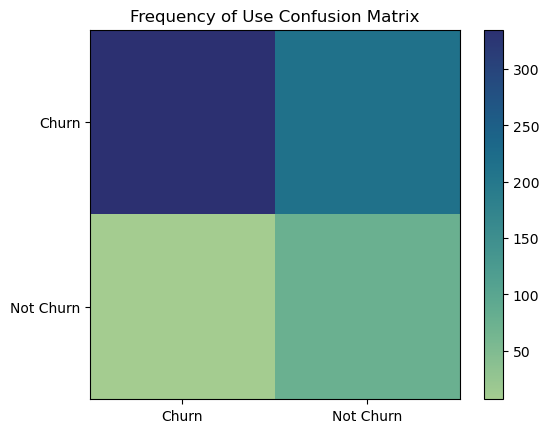

In [16]:
import matplotlib.pyplot as plt
# Select numeric columns
numeric_columns = customer_churn.select_dtypes(include=['number']).columns
customer_churn_numeric = customer_churn[numeric_columns]
# Testing frequency of use
X_fou = customer_churn_numeric.drop(["Churn", "Frequency of use"], axis=1)
y_fou = customer_churn_numeric['Churn']
# Training
X_train_fou, X_test_fou, y_train_fou, y_test_fou = train_test_split(X_fou, y_fou, test_size=0.2, random_state=45)
# Standardize data
scaler_fou = StandardScaler()
X_train_fou = scaler_fou.fit_transform(X_train_fou)
X_test_fou = scaler_fou.transform(X_test_fou)
# Gaussian Naive Bayes Classification 
gnb_fou = GaussianNB()
gnb_fou.fit(X_train_fou, y_train_fou)
gnb_fou.score(X_train_fou, y_train_fou)
t_fou = gnb_fou.score(X_test_fou, y_test_fou)
# Confusion matrix
y_fou_pred = gnb_fou.predict(X_test_fou)
confusion_matrix_fou = confusion_matrix(y_test_fou, y_fou_pred)
# Visualize matrix
cmap_fou = sns.color_palette("crest", as_cmap=True)
fig_fou, ax_fou = plt.subplots()
ticks_fou = ["Churn", "Not Churn"]
im_fou = ax_fou.imshow(confusion_matrix_fou, cmap=cmap_fou, interpolation="nearest")
ax_fou.set_xticks(np.arange(len(ticks_fou)), labels=["Churn", "Not Churn"])
ax_fou.set_yticks(np.arange(len(ticks_fou)), labels=["Churn", "Not Churn"])
ax_fou.set_title("Frequency of Use Confusion Matrix")
colorbar_fou = fig_fou.colorbar(im_fou)
print(f'Churn Prediction Accuracy: {t_fou:.2%}')
print(confusion_matrix_fou)


Explanation: In this analysis we used a Gaussian Naive Bayes classifier to predict churn from frequency of use. Looking at the performance of the model, it seems that frequency of use might not be the best indicator of customer churn. We can see that the model achieved 335 true positives, 212 false positives, 7 false negatives, and 76 true negatives, with a prediction accuracy of 65.24%. Given the low accuracy of the model, we might want to opt for a different classification. This is suprising, given that early on we predicted that frequency of use would be a major indicator of churn.

### ML Analysis 5
Name: Muhammad Owais

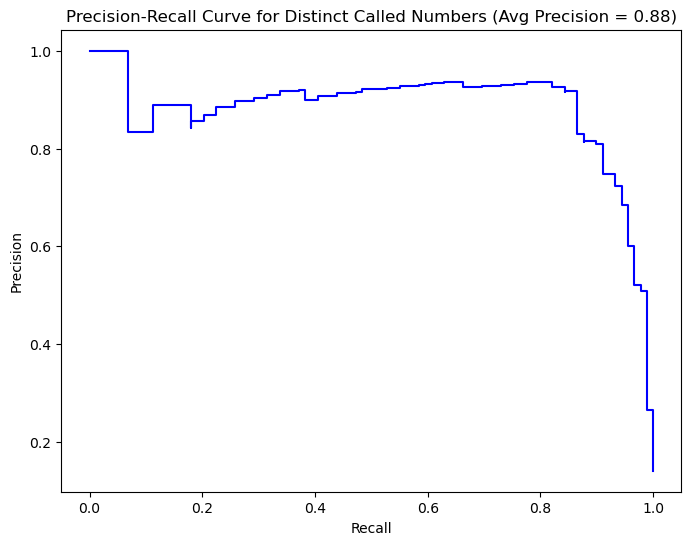

Average Precision for Distinct Called Numbers: 88.28%


In [17]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Machine Learning Analysis for Distinct Called Numbers
numeric_columns = customer_churn.select_dtypes(include=['number']).columns
customer_churn_numeric = customer_churn[numeric_columns]
X_distinct_numbers = customer_churn_numeric.drop(['Churn', 'Distinct Called Numbers'], axis=1)
y_distinct_numbers = customer_churn_numeric['Churn']
X_train_distinct_numbers, X_test_distinct_numbers, y_train_distinct_numbers, y_test_distinct_numbers = train_test_split(X_distinct_numbers, y_distinct_numbers, test_size=0.2, random_state=50)
scaler = StandardScaler()
X_train_distinct_numbers_scaled = scaler.fit_transform(X_train_distinct_numbers)
X_test_distinct_numbers_scaled = scaler.transform(X_test_distinct_numbers)
rf_model_distinct_numbers = RandomForestClassifier(random_state=50)
rf_model_distinct_numbers.fit(X_train_distinct_numbers_scaled, y_train_distinct_numbers)
y_pred_distinct_numbers = rf_model_distinct_numbers.predict(X_test_distinct_numbers_scaled)

# Get the probability estimates for positive class (churn)
y_prob_distinct_numbers = rf_model_distinct_numbers.predict_proba(X_test_distinct_numbers_scaled)[:, 1]

# Calculate precision-recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test_distinct_numbers, y_prob_distinct_numbers)
avg_precision = average_precision_score(y_test_distinct_numbers, y_prob_distinct_numbers)

# Visualize the precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Distinct Called Numbers (Avg Precision = {:.2f})'.format(avg_precision))
plt.show()

print(f'Average Precision for Distinct Called Numbers: {avg_precision:.2%}')

ML Analysis: I Use precision-recall curve for my distinct called numbers. Precision recall curve is a useful tool for evaluating the performance of a machine learning model, especially in the context of binary classification. This particular graph shows the relationship between precision (the ratio of true positive predictions to the total number of positive predictions) and recall (the ratio of true positive predictions to the total number of actual positives), as the decision threshold of the model is varied. The average precision score of 0.88 indicates a relatively high level of performance, as it suggests that when the model predicts a case as positive, it is correct 88% of the time on average.

## ML Analysis 6
Name: Levin Paulson


In this analysis,we leverage the Random Forest Algorithm to understand the key factors influencing customer churn.Random Forest's feature importance capability helps identify which variables contribute significantly to our Churn Prediction model. By visualizing feature importance, we gain insights into crucial factors affecting customer retention.

In [18]:
# Feature Importance with Random Forest
feature_importance = rf_cls_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

The feature importance analysis highlights "Complains" as the most influential factor,which has a feature importance of 0.1931, indicating that it contributes approximately 19.31% to the overall importance in predicting customer churn according to the Random Forest model, which is then followed by "Seconds of Use"(11.87%) and "Subscription Length"(10.84%).

This insight guides businesses in prioritizing efforts to address key elements impacting customer churn. The descending order of feature importance sheds light on the variables that strongly contribute to our Churn Prediction model.

It's notable that customer complaints, seconds of use, and subscription length play pivotal roles in predicting whether a customer is likely to churn.

The numerical breakdown provides a quantitative measure of each feature's impact, empowering organizations to make informed decisions for improved customer retention.

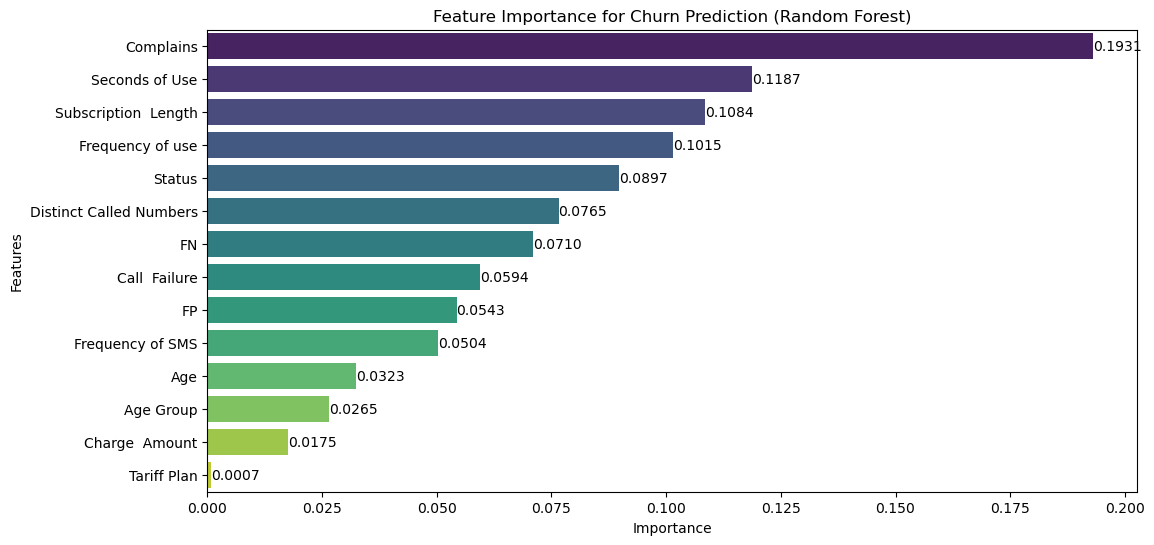

In [19]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
# Add numerical values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.4f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', color='black', fontsize=10)
plt.title('Feature Importance for Churn Prediction (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Reflection
### What is the most challenging part of the project that you've encountered so far?
Finding enough data for our project has been challening. As Levin mentioned in our proposal, companies don't really share churn data as they don't want their competitors to gain any insight. This is causing trouble for our group, as we want to view customer churn as a whole, and not for an individual industry.
### What are your initial insights?
The initial insights provide a foundation for further investigation into the factors influencing customer churn. The project is in its early stages, and additional analyses, including statistical tests and machine learning modeling, are needed to validate and quantify the insights and ultimately develop a predictive model for customer churn.
### Are there any concrete results you can show at this point? If not, why not?
At this point, the insights are preliminary, and no concrete results or specific numerical metrics (e.g., churn rates, correlations, or predictive model performance) have been presented. This is because the analysis is at an early stage, focusing on data exploration and visualization. To obtain concrete results, further data analysis, feature engineering, and machine learning modeling are necessary. Additionally, the dataset limitations, particularly the lack of certain crucial information, may require more research and the consideration of additional datasets to gain a comprehensive understanding of customer churn factors.
### Going forward, what are the current biggest problems you're facing?
Understanding our dataset presents a challenge due to its limitations. For example, looking into why certain age groups are more prone to churn services. Since our dataset lacks this specific information, we need to invest extra time in research. This involves exploring correlations between our visualizations and conducting in-depth analyses. Simplifying these complexities will help us gain meaningful insights into our data.
### Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
Yes, but we are going to have to spend more time researching resonings for our our visualizations since it isn't exactly known why some things turn out the way they do. We also might need to look into another dataset that is similar to this one just so that the results are not skewed with this particular dataset.
### Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?
Yes, it is worth proceeding because this data is still very useful and has a lot of different people that were included. Also, this is especially interesting since this is specifically Iranian data so seeing how people churn in other countries is interesting. The only thing that we might want to do is include and explore another dataset that is also about churning mobile operators, but one that just has more information in it, like education status, income status, etc. If we have that information, then we may be able to see why some people are more likely to churn than others.

## Next Steps (Midterm)

   1. Feature Engineering:<br>
      - Derive additional features based on EDA insights.<br>
      - Explore feature interactions for improved model performance.<br>
<br>
   2. Machine Learning Model Development:<br>
      - Select suitable algorithms for predicting customer churn.<br>
      - Split the dataset for training and testing.<br>
      - Implement a baseline model. <br>    
<br>
    
   3. Model Evaluation and Interpretation:<br>
      - Evaluate the machine learning models using relevant metrics such as accuracy, precision, recall etc.<br>
      - Interpret the results to understand the factors contributing to the model's predictions.<br>
<br>  
   4. Documentation:<br>
      - Document the entire process in the Jupyter notebook.<br>
      - Prepare clear visualizations for the final presentation.<br>
<br>
   5. Preparation for Final Submission (December 5):<br>
      - Draft a concise short report highlighting the main findings, methodologies, and the impact of various features customer           churn.<br>
<br>